<a href="https://colab.research.google.com/github/Alakhras/Abalone-Age/blob/main/Abalone_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification using Tensorflow and Keras
Aladdin Alakhras, University of Missouri-St. Louis

### **Problem:**
* Abalones are endangered marine snails found in cold coastal waters worldwide,  Their price is positively correlated with age.
  However, determining abalone age is complex.
A machine learning model to classify abalone age would significantly accelerate this manual process, benefiting abalone researchers and adding value to the field.

* Dataset: [`Abalone.csv`](https://github.com/Alakhras/Abalone-Age/blob/main/Abalone.csv)
  - This project classifies abalone snails as "young" or "old" based on their ring count, using input features such as gender, height, weight, etc.
* Original data at [UCI ML database](https://archive.ics.uci.edu/dataset/1/abalone)

## Step 0: Load the data

# The back-end is a Linux shell, so we can run `ls -l` and `head`.

In [13]:
import numpy as np
import pandas as pd
import os

In [16]:
BASE_PATH = 'https://github.com/Alakhras/Abalone-Age/blob/main/Abalone.csv'
dataset = pd.read_csv(BASE_PATH)
print(dataset[0:5, :])

AttributeError: module 'numpy' has no attribute 'read_csv'

### Questions:
* How many rows and columns does the data have?
* How to load a dataset that has non-numbers?

## Step 1: Preview the first 5 rows
`dataset[0:5, :]` means 'Rows 0 to 4 with all columns'

In [ ]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print(dataset[0:5, :])

InvalidIndexError: (slice(0, 5, None), slice(None, None, None))

## Step 2: Prepare the output

If the last column < 5.5, set it to 0, otherwise 1 (good wine = 1, bad wine = 0)

In [ ]:
dataset[dataset[:, -1] < 5.5, -1] = 0
dataset[dataset[:, -1] >= 5.5, -1] = 1

In [ ]:
print(dataset[0:10, :])

### Questions:
* What happens if we swap the two statements above (line numbers 1 and 2) that replace wine quality with binary values, and rerun all the steps?

## Step 3: Shuffle the rows

Shuffling may be bad for reproducibility, but it is good for reliability

In [ ]:
import random
np.random.shuffle(dataset)

## Step 4: Split into Training/Validation Set
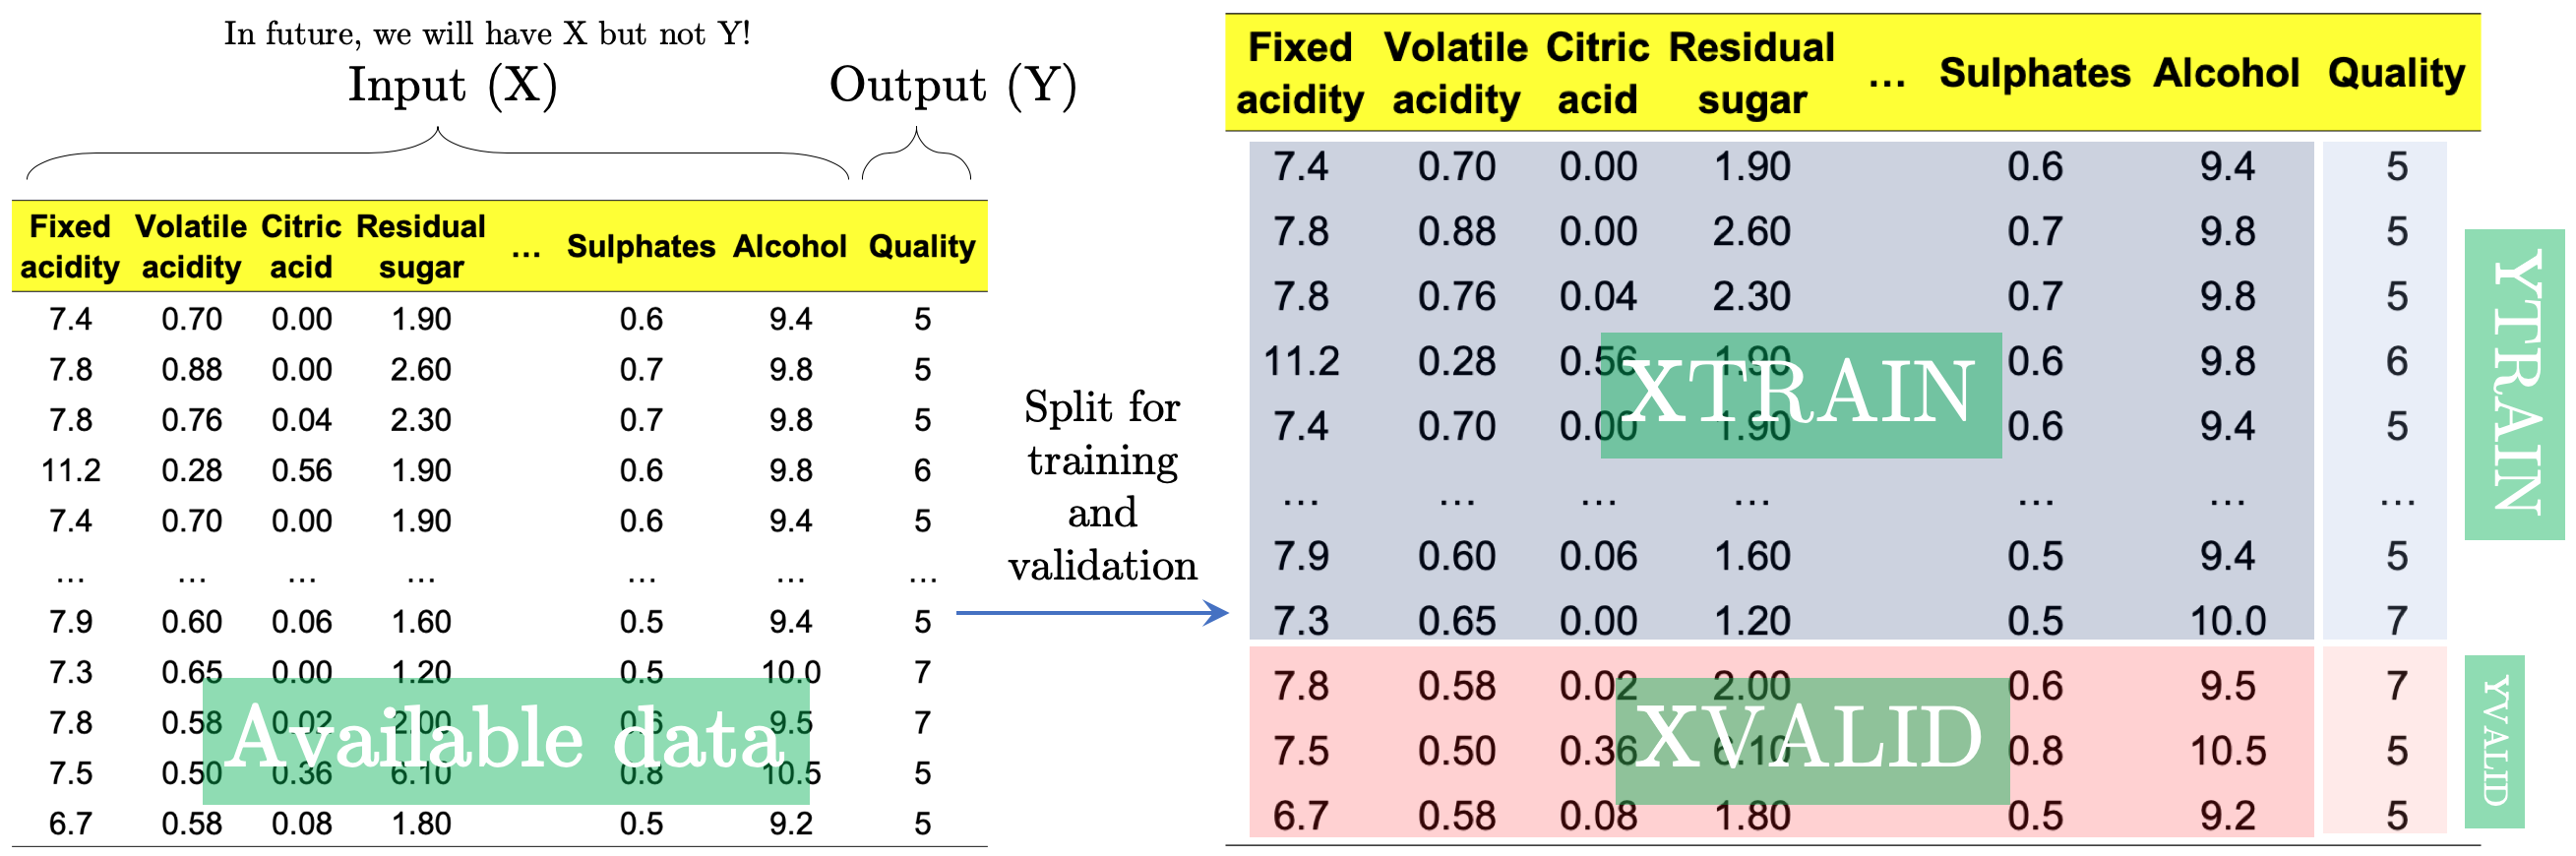

In [ ]:
index_20percent = int(0.2 * len(dataset[:, 0]))
print(index_20percent)

In [ ]:
XVALIDATION = dataset[:index_20percent, :-1]
YVALIDATION = dataset[:index_20percent, -1]

XTRAIN = dataset[index_20percent:, 0:-1]
YTRAIN = dataset[index_20percent:, -1]

### Questions:
* What is our input and output?  
* Why `0:-1` in X and `-1` in Y?
* What may happen if we don't shuffle the data?

## Step 5: Normalize (if needed)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(XTRAIN[:, 0])
plt.ylabel('0th Column (fixed acidity)')
plt.show()

In [ ]:
plt.hist(YTRAIN)
plt.ylabel('Output labels')
plt.show()

plt.hist(YVALIDATION)
plt.ylabel('Output labels')
plt.show()

In [ ]:
mean = XTRAIN.mean(axis=0)
XTRAIN -= mean
std = XTRAIN.std(axis=0)
XTRAIN /= std

XVALIDATION -= mean
XVALIDATION /= std

In [ ]:
print(mean)
print(std)

In [ ]:
plt.hist(XTRAIN[:, 0])
plt.ylabel('0th Column (fixed acidity)')
plt.show()

### Questions:
* Why did we use only the training data to obtain `mean` and `std`?

## Step 6: Review the dimensions of training & validation set
**Also preview some of the "input features" and "correct labels" for the datasets**

In [ ]:
print(XTRAIN.shape)
print(YTRAIN.shape)
print(XVALIDATION.shape)
print(YVALIDATION.shape)
print(XTRAIN[0:3,])
print(YTRAIN[0:3])
print(XVALIDATION[0:3,])
print(YVALIDATION[0:3])

## Step 7: Create a neural network model
A network with the following architecture:
- 12 neurons in layer 1
- 8 neurons in layer 2, and
- 1 neuron as the last layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = len(XTRAIN[0, :]), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

![](https://github.com/badriadhikari/DL-2020spring/blob/master/notebooks/neural-network.png?raw=true)

### Questions:
* What does `input_dim = len(XTRAIN[0, :])` mean?

## Step 8: Compile the model
Checks if there are any cycles in the Sequential model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Step 9: Train the model
* We feed `XTRAIN` into the model and the model calculates errors using `YTRAIN`
* In one epoch the model scans through the entire rows in the `XTRAIN`
* Updating the number of epochs usually increases the accuracy of the model
* To observe the accuracy on the `VALIDATION` data during the training, add `validation_data = (XTEST, YTEST)`

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'my_best_model.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

In [ ]:
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALIDATION, YVALIDATION), epochs=256, batch_size=10, callbacks = [callback_a, callback_b])

## Step 10: Check the learning curves

In [ ]:
print(history.params)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model.load_weights('my_best_model.hdf5')

## Step 11: Evaluate the model on the training data
Yes, the same data we used to train the model

In [ ]:
scores = model.evaluate(XTRAIN, YTRAIN)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

## Step 12: Evaluate on validation set
* This is a real test of the model
* We will evaluate the model on the "Unknown" dataset (i.e. validation dataset)

In [ ]:
scores = model.evaluate(XVALIDATION, YVALIDATION)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

## Step 13: Check what what the model actually predicts
* An example of what the model has predicted and comparison with the true classes

In [ ]:
print(XVALIDATION[0:5])
print(YVALIDATION[0:5])

In [ ]:
prediction = model.predict(XVALIDATION)

In [ ]:
print(prediction[0:10])

In [ ]:
print(prediction[0:10].round())

In [ ]:
plt.plot(YVALIDATION, prediction, '.', alpha = 0.3)
plt.xlabel('Correct labels')
plt.ylabel('Predicted confidence scores')
plt.show()

## Step 14: Is 'accuracy' sufficient to evaluate our model?
* We can further evaluate the model using precision, recall, and F1-score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(YVALIDATION, prediction.round())
precision = precision_score(YVALIDATION, prediction.round())
recall = recall_score(YVALIDATION, prediction.round())
f1score = f1_score(YVALIDATION, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

## Step 15: How can the performance be improved?  
* Increase the number of epochs to 100 or 150
* Add more layers into the neural networks
* How to balance the data?
* Increase/Decrease the number of rows in the training/validation set